In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import pandas as pd
%load_ext google.colab.data_table 
tables = pd.read_html("https://en.wikipedia.org/wiki/List_of_countries_by_carbon_dioxide_emissions")
countries = tables[1]
countries

In [21]:
countries.columns =['country', '1990', '2005', '2017', '2017 % of world' , '% change', 'Land (t CO2/km2/yr', 'Capital (t CO2/km2/yr', 'Total including LUCF' , 'Total excluding LUCF']
no_world = countries[countries['country'].str.contains('World')==False]

In [28]:
only_countries = no_world[no_world['country'].str.contains('European')==False]

In [ ]:
only_countries.loc[:,['country', '1990', '2005',  '2017']]
only_countries.sort_values(by='2017', axis=0, ascending=False, inplace=False, kind='quicksort', na_position='last', ignore_index=True).head(5)
Top_5_2017 = only_countries.sort_values(by='2017', axis=0, ascending=False, inplace=False, kind='quicksort', na_position='last', ignore_index=True).head(5)
Top_5_2017_plot=Top_5_2017.loc[:, "country":"2017"]
Top_5_2017_plot

Text(0, 0.5, 'Mt CO2')

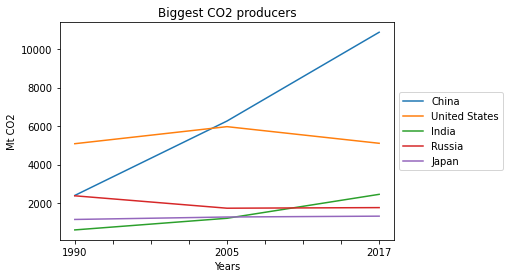

In [30]:
Top_5_2017_plot.set_index('country').T.plot()
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.title('Biggest CO2 producers')
plt.xlabel('Years')
plt.ylabel('Mt CO2')

In [31]:
landen = only_countries.loc[:,['country', '1990', '2005',  '2017']]
landen['change 1990'] = landen.loc[:,'1990'] / landen.loc[:,'1990']*100
landen['change 2005'] = landen.loc[:,'2005'] / landen.loc[:,'1990']*100
landen['change 2017'] = landen.loc[:,'2017'] / landen.loc[:,'1990']*100
landen_sorted = landen.sort_values(by='change 2017', axis=0, ascending=False, inplace=False, kind='quicksort', na_position='last', ignore_index=True)
last_3 = landen_sorted.tail(3)
top_3 = landen_sorted.head(3)
first_and_last_3 = pd.concat([top_3, last_3])
first_and_last_3_plot = first_and_last_3.loc[:,['country', 'change 1990', 'change 2005', 'change 2017']]
first_and_last_3_plot.columns =['country', '1990', '2005', '2017']
landen.head(3)


,country,1990,2005,2017,change 1990,change 2005,change 2017
3,Afghanistan,2.546,1.063,11.422,100.0,41.751767,448.625295
4,Albania,6.583,4.196,5.026,100.0,63.739936,76.348170
5,Algeria,65.677,98.197,159.929,100.0,149.515051,243.508382


Text(0, 0.5, 'index(1990=100)')

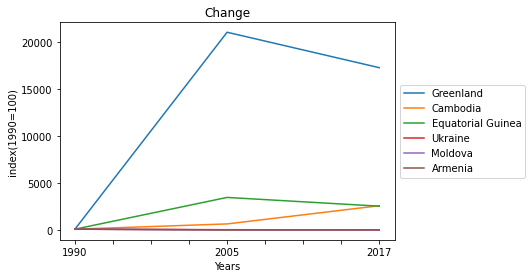

In [32]:
first_and_last_3_plot.set_index('country').T.plot()
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.title('Change')
plt.xlabel('Years')
plt.ylabel('index(1990=100)')

In [39]:
more_than_5_Mt = landen_sorted[landen_sorted['1990']> 5]
more_than_5_Mt_sort = more_than_5_Mt.sort_values(by='change 2017', axis=0, ascending=False, inplace=False, kind='quicksort', na_position='last', ignore_index=True)
top_3_more_than_5_Mt = more_than_5_Mt_sort.head(3)
last_3_more_than_5_Mt = more_than_5_Mt_sort.tail(3)
first_and_last_3_more_than_5_Mt = pd.concat([top_3_more_than_5_Mt, last_3_more_than_5_Mt])
first_and_last_3_more_than_5_Mt_plot = first_and_last_3_more_than_5_Mt.loc[:,['country', 'change 1990', 'change 2005', 'change 2017']]
first_and_last_3_more_than_5_Mt_plot.columns =['country', '1990', '2005', '2017']

Text(0, 0.5, 'index(1990=100)')

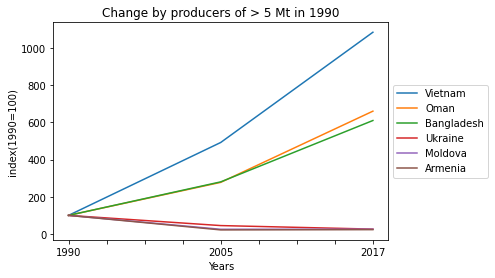

In [40]:
first_and_last_3_more_than_5_Mt_plot.set_index('country').T.plot()
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.title('Change by producers of > 5 Mt in 1990')
plt.xlabel('Years')
plt.ylabel('index(1990=100)')